In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 

 # MINIST

In [2]:
from keras.datasets import mnist # Tensorflow backend

Using TensorFlow backend.


In [3]:
(x0_train,y0_train),(x0_test,y0_test) = mnist.load_data() # 已經把 train test分開了！

In [4]:
y0_train[59999]  # 255全黑 0全白

8

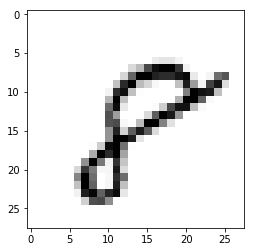

In [5]:
plt.imshow(x0_train[59999],cmap="Greys")

 #  改變x形狀

 ### 要改變，因為輸入要變成向量，不是矩陣

In [6]:
x0_train.shape #有六萬筆，每筆都是28*28      矩陣變成向量

(60000, 28, 28)

In [7]:
x_train = x0_train.reshape(60000,28*28) #變成28*28列

In [8]:
x_test = x0_test.reshape(10000,28*28)

 # 改變y形狀  改變方法比較不一樣

In [9]:
y0_train[42323]  # 想把它改成 [0,0,1,0,0,0,0,0,0,0]，變成 10列

2

In [10]:
from keras.utils import np_utils

In [11]:
y_train = np_utils.to_categorical(y0_train,10)

In [12]:
y_test = np_utils.to_categorical(y0_test,10)

 # 開始

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation  #Dense就是神經元密度
from keras.optimizers import SGD

In [14]:
model = Sequential()

In [15]:
model.add(Dense(units=500, input_dim=784)) # 第一層 input_dim一定要設定，就是向量數
model.add(Activation('sigmoid'))

In [16]:
model.add(Dense(units=500))  # units就是神經元數量
model.add(Activation('relu'))

In [17]:
model.add(Dense(units=500))
model.add(Activation('relu'))

In [18]:
model.add(Dense(units=10))  #輸出是10 !
model.add(Activation('softmax'))   # 重要！！！softmax輸出的值，10個數字，加起來要等於1

In [19]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])  #把上面的零件組裝起來，好興奮啊   lr是learning rate


In [20]:
model.fit(x_train, y_train, batch_size=100, epochs=20) # batch size：看到100個資料就調整一次參數

Epoch 1/20
60000/60000 [==============================] - 17s - loss: 0.0493 - acc: 0.6785    
Epoch 2/20
60000/60000 [==============================] - 17s - loss: 0.0183 - acc: 0.8881    
Epoch 3/20
60000/60000 [==============================] - 17s - loss: 0.0139 - acc: 0.9138    
Epoch 4/20
60000/60000 [==============================] - 18s - loss: 0.0117 - acc: 0.9274    
Epoch 5/20
60000/60000 [==============================] - 16s - loss: 0.0103 - acc: 0.9349    
Epoch 6/20
60000/60000 [==============================] - 16s - loss: 0.0094 - acc: 0.9412    
Epoch 7/20
60000/60000 [==============================] - 16s - loss: 0.0086 - acc: 0.9469    
Epoch 8/20
60000/60000 [==============================] - 17s - loss: 0.0078 - acc: 0.9520    
Epoch 9/20
60000/60000 [==============================] - 17s - loss: 0.0073 - acc: 0.9556    
Epoch 10/20
60000/60000 [==============================] - 17s - loss: 0.0067 - acc: 0.9590    
Epoch 11/20
60000/60000 [========================

In [21]:
from ipywidgets import interact_manual


In [22]:
result = model.predict_classes(x_test)

 9952/10000 [============================>.] - ETA: 0s

In [24]:
def 辨識(測試編號):
    plt.imshow(x0_test[測試編號], cmap="Greys")
    print("神經網路判斷為:", result[測試編號])

神經網路判斷為: 0


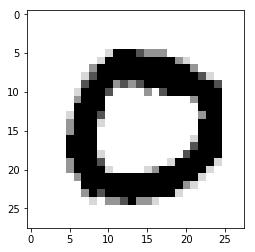

In [25]:
interact_manual(辨識, 測試編號 = (0, 9999))